In [6]:
import os
import bisect
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
from rDLSpp import IOfuncs as iof
from rDLSpp import RheoConfig as rconf
from rDLSpp import RheoCorr as rcorr
from rDLSpp import FTrheo as ft
from rDLSpp import AnalysisFuncs as af
from DSH import SharedFunctions as sf
from pathlib import Path

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

This tutorial explains how to load and analyze oscillatory rheology experiments

In [7]:
froot = r'G:\250620_XP2626_3perc'
rheo_protocol = rconf.RheoProtocol(froot, 'Config_Rheo.ini', 'expLog.txt')
list_names = rheo_protocol.GetFullFilenames()
rheo_explog = rheo_protocol.LoadExpLog()
rheo_explog

INFO:root:84 rows read from expLog file G:\250620_XP2626_3perc\expLog.txt


,ID,Time,Type,Name,Force,Displacement,Speed,Period,Offset,RelOffset,...,StartedOn,EndedOn,StartPos,EndPos,StartForce,EndForce,Trigger,Active,Axis,StrainControlled
0,2,20.3635,0,01_TimeSweep,<err>,0.01,0.0628319,1,0,1,...,0.044317,20.3159,15,15,0.0968657,0.136349,0,1,0,1
1,1,20.7127,4,02_FlowCurve_000,<err>,2,10,<err>,0,1,...,20.3962,20.709,15,17,-0.02369,0.0226371,0,1,0,1
2,1,21.0503,4,02_FlowCurve_000,<err>,2,10,<err>,0,1,...,20.7334,21.0464,17,15,0.00579089,0.257958,0,1,0,1
3,2,21.6375,4,02_FlowCurve_001,<err>,2,4.64159,<err>,0,1,...,21.0889,21.6317,15,17,0.188993,-0.0352718,0,1,0,1
4,2,22.1923,4,02_FlowCurve_001,<err>,2,4.64159,<err>,0,1,...,21.6538,22.1862,17,15,0.00579089,0.226371,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,5,1583.77,0,05_FreqSweep_LoqFreq_004,<err>,0.01,0.01,6.28319,0,1,...,1552.11,1583.73,15,15,0.0889691,0.0652791,0,1,0,1
79,6,1639.93,0,05_FreqSweep_LoqFreq_005,<err>,0.01,0.00562341,11.1733,0,1,...,1583.79,1639.88,15,15,-0.090022,-0.00894955,0,1,0,1
80,7,1739.55,0,05_FreqSweep_LoqFreq_006,<err>,0.01,0.00316228,19.8692,0,1,...,1639.95,1739.51,15,15,0.0773873,0.0884426,0,1,0,1
81,8,1916.49,0,05_FreqSweep_LoqFreq_007,<err>,0.01,0.00177828,35.3329,0,1,...,1739.58,1916.44,15,15,0.125294,0.0652791,0,1,0,1


In [8]:
FreqSweep_FTres = af.proc_files(list_names, rheo_explog, filter_name='FreqSweep', anal_type='FT', anal_params={'nperiods':1})
np.savetxt(os.path.join(froot, 'FreqSweep_FTres.dat'), FreqSweep_FTres, delimiter='\t', 
            header='time\tamplitude\tperiod\toffset\tF_abs\tF_phase\tx_abs\tx_phase\tk_abs\tk_phase\tk_real\tk_imag\tF_avg\tOSR_period\tOSR_amp')

In [12]:
TimeSweep_FTres = af.proc_files(list_names, rheo_explog, filter_name='TimeSweep', anal_type='FT', anal_params={'nperiods':1})
np.savetxt(os.path.join(f
                        root, 'TimeSweep_FTres.dat'), FreqSweep_FTres, delimiter='\t', 
            header='time\tamplitude\tperiod\toffset\tF_abs\tF_phase\tx_abs\tx_phase\tk_abs\tk_phase\tk_real\tk_imag\tF_avg\tOSR_period\tOSR_amp')

In [15]:
2*TimeSweep_FTres[:,10]*gap/S

array([1226.99553715])

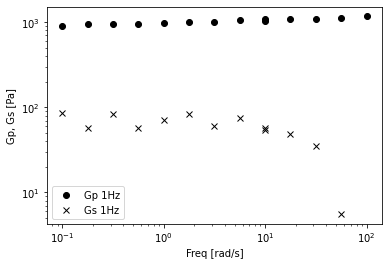

In [11]:
S = 4.77e-4 # units: m2
gap = 0.45 # units: mm

fig, ax = plt.subplots()
ax.plot(2*np.pi/FreqSweep_FTres[:,2], 2*FreqSweep_FTres[:,10]*gap/S, 'ko', label='Gp 1Hz')
ax.plot(2*np.pi/FreqSweep_FTres[:,2], 2*FreqSweep_FTres[:,11]*gap/S, 'kx', label='Gs 1Hz')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Freq [rad/s]')
ax.set_ylabel('Gp, Gs [Pa]')
ax.legend()

In [5]:
StrainSweep_FTres = af.proc_files(list_names, rheo_explog, filter_name='StrainSweep', anal_type='FT', anal_params={'nperiods':1})
np.savetxt(os.path.join(froot, 'StrainSweep_FTres.dat'), StrainSweep_FTres, delimiter='\t', 
            header='time\tamplitude\tperiod\toffset\tF_abs\tF_phase\tx_abs\tx_phase\tk_abs\tk_phase\tk_real\tk_imag\tF_avg\tOSR_period\tOSR_amp')

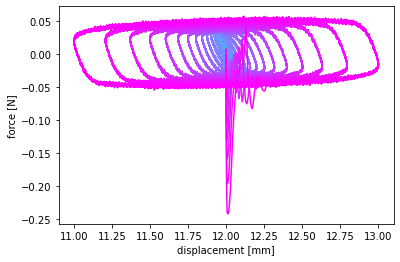

In [15]:
_ = af.proc_files(list_names, rheo_explog, filter_type=0, filter_axis=1, filter_name='StrainSweep_1Hz', max_num=21, anal_type='plot', anal_params={'plot_type': 'stressstrain'})

In [16]:
periodavg = af.proc_files(list_names, rheo_explog, filter_type=0, filter_axis=1, filter_name='StrainSweep_0.1Hz', max_num=21, anal_type='avgperiod', 
                       anal_params={'StartIdx':500, 'EndIdx':-500, 'PeriodIdx':1000})
np.savetxt(os.path.join(froot, 'DSS_0.1Hz_Periodavg.dat'), periodavg, delimiter='\t', 
            header='time[s]\t' + '\t'.join(['d{0}\tF{0}'.format(i) for i in range((periodavg.shape[1]-1)//2)]))

In [19]:
Relax_FTres = af.proc_files(list_names, rheo_explog, filter_type=0, filter_axis=1, filter_name='Relax', anal_type='FT', anal_params={'nperiods':1})
np.savetxt(os.path.join(froot, 'Relax_FTres.dat'), Relax_FTres, delimiter='\t', 
            header='time\tamplitude\tperiod\toffset\tF_abs\tF_phase\tx_abs\tx_phase\tk_abs\tk_phase\tk_real\tk_imag\tF_avg\tOSR_period\tOSR_amp')

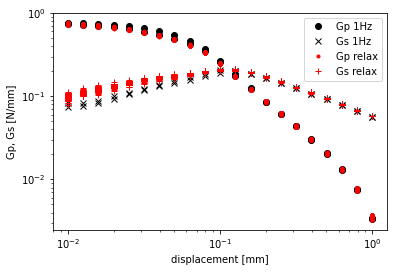

In [20]:
fig, ax = plt.subplots()
ax.plot(DSS_1Hz_FTres[:,1], DSS_1Hz_FTres[:,10], 'ko', label='Gp 1Hz')
ax.plot(DSS_1Hz_FTres[:,1], DSS_1Hz_FTres[:,11], 'kx', label='Gs 1Hz')
ax.plot(Relax_FTres[:,1], Relax_FTres[:,10], 'r.', label='Gp relax')
ax.plot(Relax_FTres[:,1], Relax_FTres[:,11], 'r+', label='Gs relax')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('displacement [mm]')
ax.set_ylabel('Gp, Gs [N/mm]')
ax.legend()

Analyze stress relaxation tests

In [21]:
rheo_explog[(rheo_explog['Type'] == '2') & (rheo_explog['Axis'] == '1')]

,ID,Time,Type,Name,Force,Displacement,Speed,Period,Offset,RelOffset,...,StartedOn,EndedOn,StartPos,EndPos,StartForce,EndForce,Trigger,Active,Axis,StrainControlled
957,120,4000.75,2,119_Step_AX1_OSR0.01_000,<err>,0.01,<err>,100,0,1,...,3590.62,4000.7,12.0012,12.0012,0.000553911,0.00144353,0,1,1,1
958,120,116.174,2,119_Step_AX1_OSR0.01_000,<err>,0.01,<err>,100,0,1,...,4001.05,116.132,12.0012,12.0012,0.00219886,0.000805689,0,1,1,1
959,120,526.702,2,119_Step_AX1_OSR0.01_001,<err>,0.01,<err>,100,0,1,...,116.564,526.639,12.0012,12.0012,0.00142674,0.0012421,0,1,1,1
960,120,937.119,2,119_Step_AX1_OSR0.01_001,<err>,0.01,<err>,100,0,1,...,527.033,937.08,12.0011,12.0012,0.00114139,0.00187994,0,1,1,1
982,122,1415.58,2,121_Step_AX1_OSR0.01_000,<err>,0.0158489,<err>,100,0,1,...,1005.44,1415.53,12.0012,12.0012,0.00100711,0.0026017,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,223,1152.64,2,222_Step_AX1_OSR0.04_001,<err>,0.630957,<err>,100,0,1,...,742.551,1152.6,12.002,12.002,0.00330668,0.000856044,0,1,1,1
2244,225,1630.95,2,224_Step_AX1_OSR0.04_000,<err>,1,<err>,100,0,1,...,1220.82,1630.91,12.0021,12.0021,0.000553911,0.00194708,0,1,1,1
2245,225,2041.35,2,224_Step_AX1_OSR0.04_000,<err>,1,<err>,100,0,1,...,1631.25,2041.3,12.0021,12.0021,0.00177923,0.000772118,0,1,1,1
2246,225,2451.8,2,224_Step_AX1_OSR0.04_001,<err>,1,<err>,100,0,1,...,2041.68,2451.76,12.0021,12.0021,0.000604266,0.00208136,0,1,1,1


In [22]:
af.proc_files(list_names, rheo_explog, filter_type=2, anal_type='count')

264

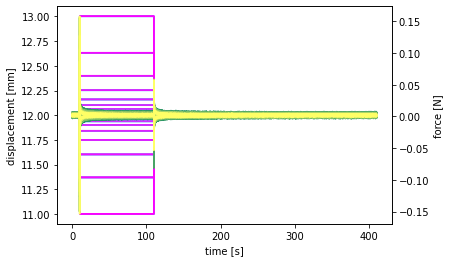

In [23]:
_ = af.proc_files(list_names, rheo_explog, filter_type=2, filter_axis=1, anal_type='plot')

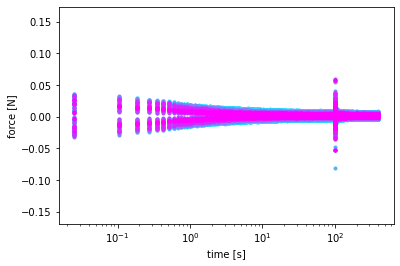

In [24]:
_ = af.proc_files(list_names, rheo_explog, filter_type=2, filter_axis=1, anal_type='plot', anal_params={'plot_type': 'stressrelax', 't0':10.1, 'fmt':'.'})

In [25]:
res_relax = []
osr_list = ['OSR0.01', 'OSR0.02', 'OSR0.04']
for osr_filter in osr_list:
    res_relax.append(af.proc_files(list_names, rheo_explog, filter_type=2, filter_axis=1, filter_name=osr_filter, anal_type='read'))

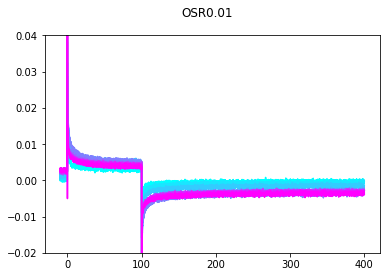

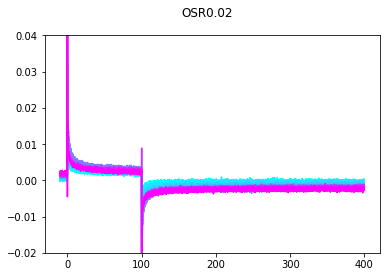

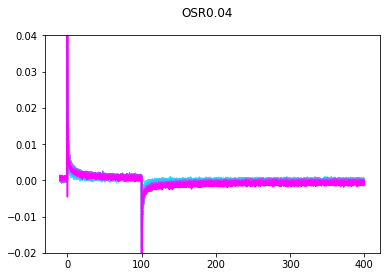

In [26]:
for oidx in range(len(res_relax)):
    fig, ax = plt.subplots()
    ax.set_prop_cycle(color=plt.cm.cool(np.linspace(0,1,int(len(res_relax[oidx])//4))))
    for i in range(0, len(res_relax[oidx]), 4):
        common_len = np.min([len(res_relax[oidx][i+j][2]) for j in range(4)])
        res_avg = -res_relax[oidx][i][2][:common_len]
        for j in range(1,4):
            res_avg += res_relax[oidx][i+j][2][:common_len]*(-1)**(j+1)
        res_avg /= 4
        ax.plot((res_relax[oidx][i][0][:common_len]-res_relax[oidx][i][0][0])/1000-10.1, res_avg)
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.set_ylim([-0.02, 0.04])
    fig.suptitle(osr_list[oidx])

Analyze OSR oscillatory rheology

In [27]:
print(rheo_protocol.intervals[201].OSR)

{'Type': 'OSCILL_POS', 'Amp': 0.04, 'Period': 1.0}


In [28]:
osr_dss_intlist = rheo_protocol.FilterIntervals({'type':'OSCILL_POS', 'axID':0, 'hasOSR':True})
osr_dss_fnames = rconf.GetIntervalFilenames(osr_dss_intlist, rheo_protocol.config_folder)
DSS_OSR_FTres = af.proc_files(osr_dss_fnames, rheo_explog, anal_type='OSR', anal_params={'OSRparam_list':[x.OSR for x in osr_dss_intlist]})#, 'Tres_Step':0.1})

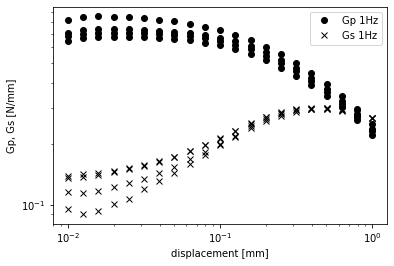

In [29]:
fig, ax = plt.subplots()
ax.plot(DSS_OSR_FTres[:,1], DSS_OSR_FTres[:,10], 'ko', label='Gp 1Hz')
ax.plot(DSS_OSR_FTres[:,1], DSS_OSR_FTres[:,11], 'kx', label='Gs 1Hz')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('displacement [mm]')
ax.set_ylabel('Gp, Gs [N/mm]')
ax.legend()

In [53]:
filter_ext = '_tresOSR.txt'
OSR_Tres_stepPeriods = 0.1
OSR_MainPeriod = 10.0
ORS_superpPeriod = 1.0
OSR_Tres_periodN = int(OSR_MainPeriod/(ORS_superpPeriod*OSR_Tres_stepPeriods))
print(OSR_Tres_periodN)
tres_fnames = sf.FindFileNames(froot, Ext=filter_ext, FilterString='_StrainSweep_')
DSS_OSR_combres = np.empty((OSR_Tres_periodN+1, 1+2*len(tres_fnames)), dtype=float)
DSS_OSR_combres[:,0] = np.linspace(0,OSR_MainPeriod,OSR_Tres_periodN+1,endpoint=True)
save_hdr = 't[s]'
for fidx in range(len(tres_fnames)):
    orig_fname = tres_fnames[fidx][:-len(filter_ext)] + '.txt'
    pars = iof.find_file_params(orig_fname, rheo_explog)
    cur_amp = float(pars['Displacement'])
    t, Gp, Gs = np.loadtxt(os.path.join(froot, tres_fnames[fidx]), unpack=True)
    Gp_filterbad = np.where(Gp<-1e-3,Gp,np.nan)
    Gs_filterbad = np.where(Gs<-1e-3,Gs,np.nan)
    for i in range(OSR_Tres_periodN):
        DSS_OSR_combres[i,1+2*fidx] = np.nanmean(-Gp_filterbad[i::OSR_Tres_periodN])*2*0.39/9.75e-4
        DSS_OSR_combres[i,1+2*fidx+1] = np.nanmean(-Gs_filterbad[i::OSR_Tres_periodN])*2*0.39/9.75e-4
    save_hdr += '\tGp_{0}\tGs_{0}'.format(cur_amp)
DSS_OSR_combres[OSR_Tres_periodN,1:]=DSS_OSR_combres[0,1:]
np.savetxt(os.path.join(froot, 'DSS_OSR_combined_fine.dat'), DSS_OSR_combres, delimiter='\t', header=save_hdr)

100


In [ ]:
osr_flow_intlist = rheo_protocol.FilterIntervals({'type':'STEP_RATE', 'axID':0, 'hasOSR':True})
osr_flow_fnames = rconf.GetIntervalFilenames(osr_flow_intlist, rheo_protocol.config_folder)
speed_list = [0.002, 0.003, 0.004, 0.005, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07, 0.08, 0.09, 0.095, 0.1]
flow_OSRres_list = []
flow_OSRres_Tres_list = []
for v in speed_list:
    flow_OSRres_Tres_list.append([])
    flow_OSRres_list.append(proc_files(osr_flow_fnames, rheo_explog, anal_type='OSR', filter_name=str(v)+'_amp0.02', 
                                       anal_params={'OSRparam_list':[x.OSR for x in osr_flow_intlist]}))

In [ ]:
fig, ax = plt.subplots()
ax.set_prop_cycle(color=plt.cm.cool(np.linspace(0,1,len(flow_OSRres_list)*2)))
for vidx in range(len(flow_OSRres_list)):
    ax.plot(1/flow_OSRres_list[vidx][:,-2], flow_OSRres_list[vidx][:,10], 'o', label='Gp ' + str(speed_list[vidx]))
    ax.plot(1/flow_OSRres_list[vidx][:,-2], flow_OSRres_list[vidx][:,11], 'x', label='Gs ' + str(speed_list[vidx]))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('1/period [Hz]')
ax.set_ylabel('Gp, Gs [N/mm]')

In [ ]:
_ = proc_files(osr_flow_fnames[36:37], rheo_explog, anal_type='plot')

In [ ]:
filter_ext = '_tresOSR.txt'
tmin_avg = 18
tres_fnames = sf.FindFileNames(froot, Ext=filter_ext, FilterString='_OSR_')
fig, ax = plt.subplots()
ax.set_prop_cycle(color=plt.cm.cool(np.linspace(0,1,len(tres_fnames))))
OSR_combinedres = np.empty((len(tres_fnames), 6), dtype=float)
for fidx in range(len(tres_fnames)):
    t, Gp, Gs = np.loadtxt(os.path.join(froot, tres_fnames[fidx]), unpack=True)
    ax.plot(t, -Gp, '.')
    #ax.plot(t, -Gs, 'x:')
    if sf.IsIterable(t):
        if tmin_avg < np.max(t):
            tidx = bisect.bisect(t, tmin_avg)
            avGp = np.mean(-Gp[tidx:])
            avGs = np.mean(-Gs[tidx:])
        else:
            avGp = -Gp[-1]
            avGs = -Gs[-1]
    else:
        avGp = -Gp
        avGs = -Gs
    orig_fname = tres_fnames[fidx][:-len(filter_ext)] + '.txt'
    pars = find_file_params(orig_fname, rheo_explog)
    if orig_fname[-10:-8] == '05':
        OSR_period = 0.5
    else:
        OSR_period = sf.LastIntInStr(orig_fname)
    if '_amp0.02_' in orig_fname:
        OSR_amp = 0.02
    else:
        OSR_amp = 0.01
    OSR_combinedres[fidx] = (float(pars['Speed']), OSR_period, OSR_amp, 2*np.pi/OSR_period, avGp, avGs)
ax.axvline(tmin_avg, ls=':', c='k')
ax.set_xlabel('t [s]')
ax.set_ylabel('Gp [N/mm]')

save_hdr = 'rate[mm/s]\tPeriod[s]\tAmp[mm]\tfreq[rad/s]\tGp[N/mm]\tGs[N/mm]'
np.savetxt(os.path.join(froot, 'Flow_OSR_combined.dat'), OSR_combinedres, delimiter='\t', header=save_hdr)

OSR_combinedres_avg = np.empty((OSR_combinedres.shape[0]//2, OSR_combinedres.shape[1]), dtype=float)
for i in range(OSR_combinedres_avg.shape[0]):
    OSR_combinedres_avg[i] = np.mean(OSR_combinedres[2*i:2*i+2], axis=0)
np.savetxt(os.path.join(froot, 'Flow_OSR_combined_avg.dat'), OSR_combinedres_avg, delimiter='\t', header=save_hdr)

In [ ]:
flow_OSRres_list[vidx][:,-2]

In [ ]:
flowOSR_T1_G, flowOSR_T5_G = [], []
for vidx in range(len(flow_OSRres_list)):
    row1_idx = np.where(flow_OSRres_list[vidx][:,-2]==1)[0][0]
    flowOSR_T1_G.append([flow_OSRres_list[vidx][row1_idx,10], flow_OSRres_list[vidx][row1_idx,11]])
    row5_idx = np.where(flow_OSRres_list[vidx][:,-2]==5)[0][0]
    flowOSR_T5_G.append([flow_OSRres_list[vidx][row5_idx,10], flow_OSRres_list[vidx][row5_idx,11]])
flowOSR_T1_G = np.asarray(flowOSR_T1_G)
flowOSR_T5_G = np.asarray(flowOSR_T5_G)

fig, ax = plt.subplots()
ax.plot(speed_list, flowOSR_T1_G[:,0], 'ko', label='Gp 1Hz')
ax.plot(speed_list, flowOSR_T1_G[:,1], 'kx', label='Gs 1Hz')
#ax.plot(speed_list, 0.05/np.asarray(speed_list), 'k:', label='Gp 1Hz')
#ax.plot(speed_list, -flowOSR_T5_G[:,0], 'ro', label='Gp 0.2Hz')
#ax.plot(speed_list, -flowOSR_T5_G[:,1], 'rx', label='Gs 0.2Hz')
#ax.plot(speed_list, 8e-3/np.asarray(speed_list), 'r:', label='Gp 1Hz')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('speed [mm/s]')
ax.set_ylabel('Gp, Gs [N/mm]')
#ax.set_ylim([1e-1,100])

In [ ]:
osr_relax_intlist = rheo_protocol.FilterIntervals({'type':'STEP_POS', 'name_contains':'OSR0.04', 'axID':0, 'hasOSR':True})
osr_relax_fnames = rconf.GetIntervalFilenames(osr_relax_intlist, rheo_protocol.config_folder)
relax_OSR_FTres = proc_files(osr_relax_fnames, rheo_explog, anal_type='OSR', anal_params={'OSRparam_list':[x.OSR for x in osr_relax_intlist]})

In [ ]:
fig, ax = plt.subplots()
ax.plot(relax_OSR_FTres[:,1], relax_OSR_FTres[:,10], 'ko', label='Gp 1Hz')
ax.plot(relax_OSR_FTres[:,1], relax_OSR_FTres[:,11], 'kx', label='Gs 1Hz')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('displacement [mm]')
ax.set_ylabel('Gp, Gs [N/mm]')
ax.legend()

In [ ]:
list(set([x.amplitude for x in osr_relax_intlist]))

Compare to parallel superposition

In [13]:
froot_PSR = r'D:\steaime\Data\RheoSALS\250506_newRheo_Sample2\05_OSR_overnight'
rheo_protocol_PSR = rconf.RheoProtocol(froot_PSR, 'Config_Rheo.ini', 'expLog.txt')
list_names_PSR = rheo_protocol_PSR.GetFullFilenames()
rheo_explog_PSR = rheo_protocol_PSR.LoadExpLog()
rheo_explog_PSR

INFO:root:145 rows read from expLog file D:\steaime\Data\RheoSALS\250506_newRheo_Sample2\05_OSR_overnight\expLog.txt


,ID,Time,Type,Name,Force,Displacement,Speed,Period,Offset,RelOffset,...,StartedOn,EndedOn,StartPos,EndPos,StartForce,EndForce,Trigger,Active,Axis,StrainControlled
0,2,326.8,4,01_OSR_0.003_amp0.02_T05,<err>,1,0.00316228,<err>,0,1,...,0.307488,326.626,15,16,-0.0279015,-0.00842311,0,1,0,1
1,2,653.605,4,01_OSR_0.003_amp0.02_T05,<err>,1,0.00316228,<err>,0,1,...,327.111,653.551,15,15,-0.056856,0.0815989,0,1,0,1
2,3,980.409,4,02_OSR_0.003_amp0.02_T1,<err>,1,0.00316228,<err>,0,1,...,653.926,980.234,15,16,0.0105289,0.0178991,0,1,0,1
3,3,1307.23,4,02_OSR_0.003_amp0.02_T1,<err>,1,0.00316228,<err>,0,1,...,980.744,1307.19,15,15,0.0868633,0.0863369,0,1,0,1
4,4,1634.05,4,03_OSR_0.003_amp0.02_T2,<err>,1,0.00316228,<err>,0,1,...,1307.55,1633.87,15,16,0.066332,-0.133717,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,71,944.459,4,70_OSR_0.1_amp0.01_T5,<err>,1,0.1,<err>,0,1,...,924.153,944.396,15,15,-0.085284,-0.0347453,0,1,0,1
140,72,965.066,4,71_OSR_0.1_amp0.01_T10,<err>,1,0.1,<err>,0,1,...,944.78,964.891,15,15.9999,0.0100024,-0.0726493,0,1,0,1
141,72,985.675,4,71_OSR_0.1_amp0.01_T10,<err>,1,0.1,<err>,0,1,...,965.37,985.625,15,15,0.0173727,0.0147404,0,1,0,1
142,73,1006.28,4,72_OSR_0.1_amp0.01_T20,<err>,1,0.1,<err>,0,1,...,986.01,1006.11,15,16,0.00157933,-0.102657,0,1,0,1


In [15]:
list_names_PSR

['D:\\steaime\\Data\\RheoSALS\\250506_newRheo_Sample2\\05_OSR_overnight\\01_OSR_0.003_amp0.02_T05_POS.txt',
 'D:\\steaime\\Data\\RheoSALS\\250506_newRheo_Sample2\\05_OSR_overnight\\01_OSR_0.003_amp0.02_T05_NEG.txt',
 'D:\\steaime\\Data\\RheoSALS\\250506_newRheo_Sample2\\05_OSR_overnight\\02_OSR_0.003_amp0.02_T1_POS.txt',
 'D:\\steaime\\Data\\RheoSALS\\250506_newRheo_Sample2\\05_OSR_overnight\\02_OSR_0.003_amp0.02_T1_NEG.txt',
 'D:\\steaime\\Data\\RheoSALS\\250506_newRheo_Sample2\\05_OSR_overnight\\03_OSR_0.003_amp0.02_T2_POS.txt',
 'D:\\steaime\\Data\\RheoSALS\\250506_newRheo_Sample2\\05_OSR_overnight\\03_OSR_0.003_amp0.02_T2_NEG.txt',
 'D:\\steaime\\Data\\RheoSALS\\250506_newRheo_Sample2\\05_OSR_overnight\\04_OSR_0.003_amp0.02_T5_POS.txt',
 'D:\\steaime\\Data\\RheoSALS\\250506_newRheo_Sample2\\05_OSR_overnight\\04_OSR_0.003_amp0.02_T5_NEG.txt',
 'D:\\steaime\\Data\\RheoSALS\\250506_newRheo_Sample2\\05_OSR_overnight\\05_OSR_0.003_amp0.02_T10_POS.txt',
 'D:\\steaime\\Data\\RheoSALS\\250

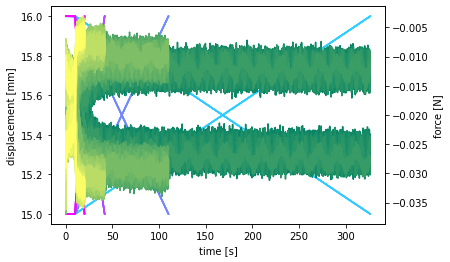

In [45]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)
_ = proc_files(list_names_PSR, rheo_explog_PSR, filter_type=4, filter_name='_amp0.01_', rep_len=0, anal_type='plot')

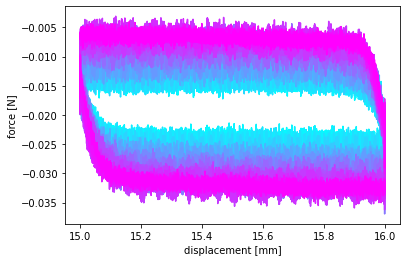

In [46]:
_ = proc_files(list_names_PSR, rheo_explog_PSR, filter_type=4, filter_name='_amp0.01_', anal_type='plot', anal_params={'plot_type': 'stressstrain'})

Text(0, 0.5, 'F [N]')

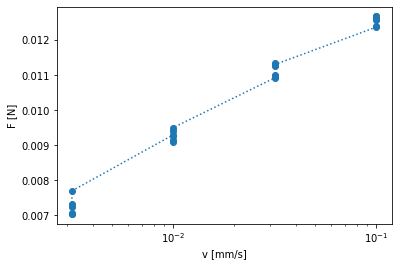

In [47]:
v_PSR, F_PSR = proc_files(list_names_PSR, rheo_explog_PSR, filter_type=4, filter_name='_amp0.01_', anal_type='flowcurve', anal_params={'displ_range':[0.4,0.6]})
fig, ax = plt.subplots()
ax.plot(v_PSR[::2], np.abs(0.5*(F_PSR[1::2]-F_PSR[::2])), 'o:')
ax.set_xscale('log')
ax.set_xlabel('v [mm/s]')
ax.set_ylabel('F [N]')

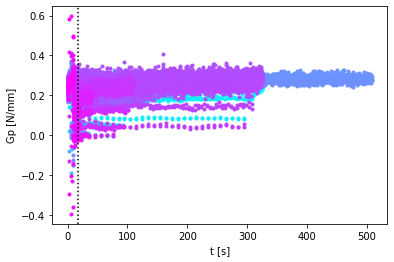

In [50]:
osr_flow_intlist_PSR = rheo_protocol_PSR.FilterIntervals({'type':'STEP_RATE', 'axID':0, 'hasOSR':True})#, 'name_contains':'_amp0.01_'
osr_flow_fnames_PSR = rconf.GetIntervalFilenames(osr_flow_intlist_PSR, rheo_protocol_PSR.config_folder)
_ = proc_files(osr_flow_fnames_PSR, rheo_explog_PSR, anal_type='OSR', anal_params={'OSRparam_list':[x.OSR for x in osr_flow_intlist_PSR], 'Tres_Step':0.5})

filter_ext = '_tresOSR.txt'
tmin_avg = 18
tres_fnames = sf.FindFileNames(froot_PSR, Ext=filter_ext, FilterString='_OSR_')
fig, ax = plt.subplots()
ax.set_prop_cycle(color=plt.cm.cool(np.linspace(0,1,len(tres_fnames))))
PSR_combinedres = np.empty((len(tres_fnames), 6), dtype=float)
for fidx in range(len(tres_fnames)):
    t, Gp, Gs = np.loadtxt(os.path.join(froot_PSR, tres_fnames[fidx]), unpack=True)
    ax.plot(t, -Gp, '.')
    #ax.plot(t, -Gs, 'x:')
    if sf.IsIterable(t):
        if tmin_avg < np.max(t):
            tidx = bisect.bisect(t, tmin_avg)
            avGp = np.mean(-Gp[tidx:])
            avGs = np.mean(-Gs[tidx:])
        else:
            avGp = -Gp[-1]
            avGs = -Gs[-1]
    else:
        avGp = -Gp
        avGs = -Gs
    orig_fname = tres_fnames[fidx][:-len(filter_ext)] + '.txt'
    pars = find_file_params(orig_fname, rheo_explog_PSR)
    if orig_fname[-10:-8] == '05':
        PSR_period = 0.5
    else:
        PSR_period = sf.LastIntInStr(orig_fname)
    if '_amp0.02_' in orig_fname:
        PSR_amp = 0.02
    else:
        PSR_amp = 0.01
    PSR_combinedres[fidx] = (float(pars['Speed']), PSR_period, PSR_amp, 2*np.pi/PSR_period, avGp, avGs)
ax.axvline(tmin_avg, ls=':', c='k')
ax.set_xlabel('t [s]')
ax.set_ylabel('Gp [N/mm]')

save_hdr = 'rate[mm/s]\tPeriod[s]\tAmp[mm]\tfreq[rad/s]\tGp[N/mm]\tGs[N/mm]'
np.savetxt(os.path.join(froot_PSR, 'Flow_PSR_combined.dat'), PSR_combinedres, delimiter='\t', header=save_hdr)

PSR_combinedres_avg = np.empty((PSR_combinedres.shape[0]//2, PSR_combinedres.shape[1]), dtype=float)
for i in range(PSR_combinedres_avg.shape[0]):
    PSR_combinedres_avg[i] = np.mean(PSR_combinedres[2*i:2*i+2], axis=0)
np.savetxt(os.path.join(froot_PSR, 'Flow_PSR_combined_avg.dat'), PSR_combinedres_avg, delimiter='\t', header=save_hdr)